/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


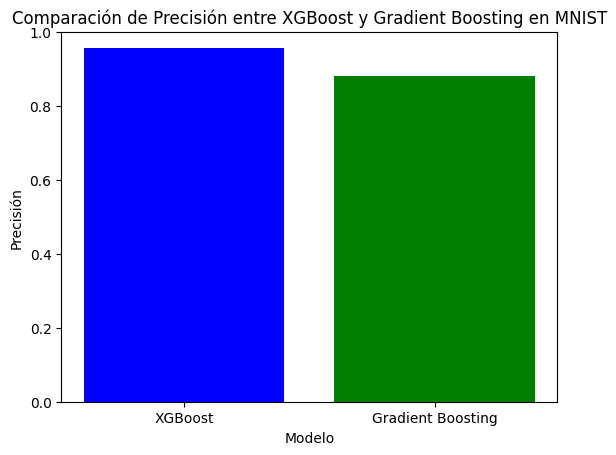

In [1]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Convertir las etiquetas a enteros
y = y.astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear una instancia del clasificador XGBoost Classifier
model_xgb = XGBClassifier(
    objective='multi:softprob',  # Problema de clasificación multiclase
    max_depth=5,                 # Profundidad máxima del árbol
    learning_rate=0.5,           # Tasa de aprendizaje
    n_estimators=20,            # Número de árboles
    random_state=0             # Semilla para el muestreo aleatorio
)

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test)

# Calcular la precisión del modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Crear una instancia del clasificador Gradient Boosting Classifier
clf = GradientBoostingClassifier(
    n_estimators=20,  # Número de árboles
    learning_rate=0.5,  # Tasa de aprendizaje
    max_features=2,  # Número de variables a considerar en cada split
    max_depth=6,  # Profundidad máxima del árbol
    random_state=0  # Semilla para el muestreo aleatorio
)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = clf.predict(X_test)

# Calcular la precisión del modelo Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Precisión de los modelos
precisions = [accuracy_xgb, accuracy_gb]
model_names = ['XGBoost', 'Gradient Boosting']

# Crear el gráfico de barras
plt.bar(model_names, precisions, color=['blue', 'green'])
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre XGBoost y Gradient Boosting en MNIST')
plt.ylim(0, 1.0)  # Ajusta el rango del eje y a 0-1

# Mostrar el gráfico
plt.show()


In [3]:


# Calcular la precisión del modelo xgb
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 95.64%


In [4]:


# Calcular la precisión del modelo GB
accuracy = accuracy_score(y_test, y_pred_gb)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 88.25%
